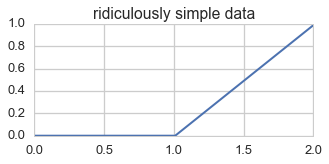

In [1]:
# <!-- collapse=True -->
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set_style('whitegrid')
sns.set_context('talk')

n_points = 100
x = np.linspace(0, 2, n_points)
y = np.array([0] * int(n_points/2) + list(x[:50]))

plt.figure(figsize=(5, 2))
plt.plot(x, y, linewidth=2)
plt.title('ridiculously simple data')
plt.show()

In [2]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

np.random.seed(0)
model = Sequential()
model.add(Dense(output_dim=1, input_dim=1, init="normal"))
model.add(Activation("relu"))
model.compile(loss='mean_squared_error', optimizer='sgd')

weights = model.layers[0].get_weights()
w0 = weights[0][0][0]
w1 = weights[1][0]
'net initialized with weigths w0: {w0:.2f}, w1: {w1:.2f}'.format(**locals())

Using Theano backend.


//anaconda/lib/python3.5/site-packages/theano/tensor/signal/downsample.py:5: UserWarning: downsample module has been moved to the pool module.
  warnings.warn("downsample module has been moved to the pool module.")


'net initialized with weigths w0: 0.09, w1: 0.00'

In [3]:
from keras.callbacks import Callback

%matplotlib notebook
epochs = 5000
batch_size = 100
n_batches = n_points / batch_size
intermediates = []

X_train = np.array(x, ndmin=2).T
Y_train = np.array(y, ndmin=2).T

class PlotLoss(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.i = 0

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.i += 1        
        if self.i % 100 == 0:        
            pred = model.predict(X_train)
            intermediates.append(pred)
            
loss = PlotLoss()
%time model.fit(X_train,\
                Y_train,\
                nb_epoch=epochs,\
                batch_size=batch_size,\
                verbose=0,\
                callbacks=[loss])
%matplotlib inline

CPU times: user 2.14 s, sys: 47.5 ms, total: 2.19 s
Wall time: 2.34 s


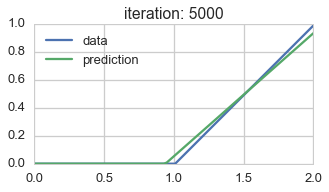

In [22]:
import matplotlib.animation as animation

fig = plt.figure(figsize=(5, 2.5))
plt.plot(x, y,  label='data')
line, = plt.plot(x, intermediates[0],  label='prediction')
plt.legend(loc='upper left')
#plt.tight_layout()

def update_line(num):
    plt.title('iteration: {0}'.format((100 * (num + 1))))
    line.set_xdata(x)
    line.set_ydata(intermediates[num])
    return []

ani = animation.FuncAnimation(fig, update_line, len(intermediates),
                                   interval=50, blit=True)
ani.save('../videos/neuron.mp4', extra_args=['-vcodec', 'libx264'])

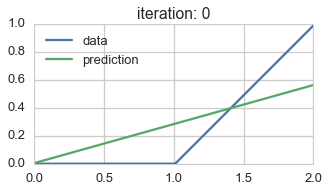

In [23]:
plt.figure(figsize=(5, 2.5))
plt.plot(x, y, label='data')
plt.plot(x, intermediates[0], label='prediction')
plt.legend(loc='upper left')
plt.title('iteration: 0')
#plt.tight_layout()
plt.savefig('../images/neuron_start.png')

In [ ]:
pred = model.predict(X_train)
plt.plot(x, pred)
plt.plot(x, y)

In [ ]:
# from keras.optimizers import RMSprop
# opti = RMSprop(lr=0.001, rho=0.9, epsilon=1e-06)
# model.compile(loss='mean_squared_error', optimizer=opti)

In [ ]:
from keras import backend as K

def get_layer_outoput(layer):
    return K.function([model.layers[0].input],
                      [model.layers[layer].get_output(train=False)])

print('weigths')
print(model.layers[0].get_weights())
#print(model.layers[2].get_weights())
print()

#print(model.layers[0].get_weights())

# print('layers for input 0')
# print(get_layer_outoput(0)([X_train[0:1,:]])[0])
# print(get_layer_outoput(1)([X_train[0:1,:]])[0])
# #print(get_layer_outoput(2)([X_train[0:1,:]])[0])
# print()

# print('layers for input 0.5')
# print(get_layer_outoput(0)([X_train[5:6,:]])[0])
# print(get_layer_outoput(1)([X_train[5:6,:]])[0])
# #print(get_layer_outoput(2)([X_train[5:6,:]])[0])
# print()

# print('layers for input 1')
# print(get_layer_outoput(0)([X_train[10:11,:]])[0])
# print(get_layer_outoput(1)([X_train[10:11,:]])[0])
#print(get_layer_outoput(2)([X_train[10:11,:]])[0])